In [1]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

## Starting Off:


Discuss with a partner what the goal is of fitting a linear regression model. 


# Data Transformations

Transforming a variable involves using a mathematical operation to change its measurement scale. Broadly speaking, there are two kinds of transformations.
- **Linear transformation** A linear transformation preserves linear relationships between variables. Therefore, the correlation between x and y would be unchanged after a linear transformation. Examples of a linear transformation to variable x would be multiplying x by a constant, dividing x by a constant, or adding a constant to x.
- **Nonlinear tranformation** A nonlinear transformation changes (increases or decreases) linear relationships between variables and, thus, changes the correlation between variables. Examples of nonlinear transformation of variable x would be taking the square root x or the reciprocal of x.

In regression analysis, when a residual plot reveals a data set to be nonlinear, analysts sometimes apply nonlinear transformations to the independent and/or dependent variables. If this transformation increases the linearity of the relationship between the variables, it allows the analyst to use linear regression techniques appropriately with nonlinear data.

## Scaling Data

Most of the times, your dataset will contain features highly varying in magnitudes, units and range (ex: acceleration and range). For linear regression models, this makes it difficult to compare the sizes of the coefficients for different variables. We want to **get everything on the same scale so that nothing comes accross as more or less important because of the way it's measured**.

Three common ways to scale the data are:
1. **Standardization**: This redistributes the features with their mean μ = 0 and standard deviation σ =1 . `sklearn.preprocessing.scale` helps us implementing standardization in python. 
$$x' =\frac{x-\bar{x}}{\sigma}$$

2. **Mean Normalization**: This distribution will have values between -1 and 1 with μ=0.

$$x' =\frac{x-\bar{x}}{max(x)- min(x)}$$

3. **Min-Max Scaling**: This scaling brings the value between 0 and 1.

$$x' =\frac{x-min(x)}{max(x)- min(x)}$$



https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

___

Why would we use a non-linear transformation?

## Linear Regression Assumptions

1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors**: There is not a relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors.
    - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors**: The residuals must be approximately normally distributed.
    - Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


4. **Equal variances**: The variance of the residuals is the same for all values of $X$.
    - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.



Basically, when we plot our residuals, we don't want to see a trend in what we get wrong.

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_e99c/lightboxImage.img.png/1548702854476.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_7320/lightboxImage.img.png/1548702854735.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_dccd/lightboxImage.img.png/1548702855060.png' width=700>

[Source](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/)

## What does it mean if our model/data does not meet those assumptions?


The model can still be fit and predict a value. 

Remember that from our model we can create a prediction and a confidence interval for the predicted values.  

If we find that our errors follow a pattern then the assumptions we make about our confidence interval will not be accurate.  

<img src="slr_assumptions.jpg" style="width:600px;">

<img src='https://online.stat.psu.edu/onlinecourses/sites/stat501/files/02predicty/regress_mort_lat_PICI.png' width=700>



## Capturing Non-linear relationships

We can model non-linear relationships in a linear regression model by creating non-linear transformations of the data.

https://blog.minitab.com/blog/adventures-in-statistics-2/curve-fitting-with-linear-and-nonlinear-regression

***Graph of a non-linear relationship***

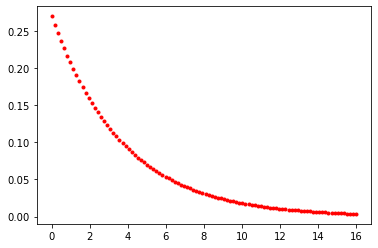

In [2]:

x = np.linspace(0, 16, 100)
Y = [0.27*exp(-0.27*_) for _ in x]
# error = norm.rvs(0, scale=0.03, size=100)
# simulated_data = [max(0, y+e) for (y,e) in zip(Y,error)]

# plt.plot(x, Y, 'b-')
plt.plot(x, Y, 'r.')
plt.show()

***Using a non-linear tansformation, taking the log of the target variable, to create a linear relationship***

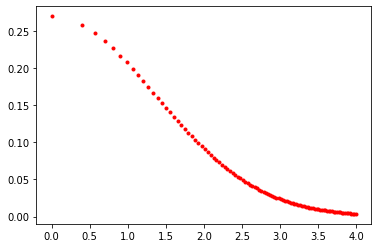

In [3]:
# plt.plot(x, Y, 'b-')
plt.plot(np.sqrt(x), Y, 'r.')
plt.show()

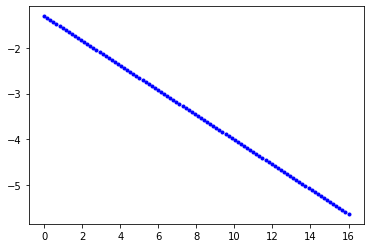

In [4]:
plt.plot(x, np.log(Y), 'b.')
plt.show()

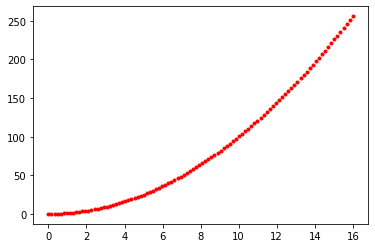

In [5]:
y = x*x

plt.plot(x, y, 'r.')
plt.show()


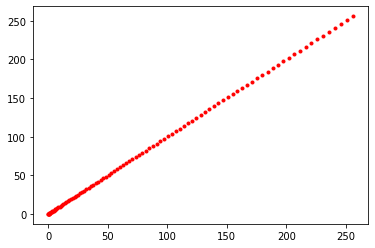

In [6]:
plt.plot(x*x,y, 'r.')
plt.show()

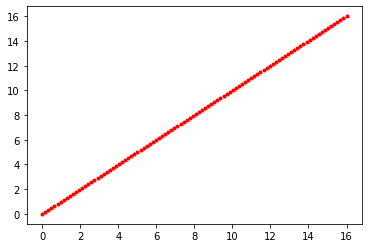

In [7]:
plt.plot(x,np.sqrt(y), 'r.')
plt.show()

### Common transformation methods

Linear and nonlinear regression are actually named after the functional form of the models that each analysis accepts. 

<img src='transformations.png'/>

# Better Modelling with Data transformations

In [3]:
df = pd.read_csv('cleaned_movie_data.csv',index_col=0)


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is to :
- answer questions, test business assumptions, generate hypotheses for further analysis
- prepare the data for modeling 

The thing that these two probably have in common is a good knowledge of your data to either get the answers that you need or to develop an intuition for interpreting the results of future 
modeling.

There are a lot of ways to reach these goals: you can get a basic description of the data, visualize it, identify patterns in it, identify challenges of using the data, etc.

In [4]:
df['gross'].describe()

count    3.142000e+03
mean     5.647369e+07
std      7.223622e+07
min      7.030000e+02
25%      1.083892e+07
50%      3.335371e+07
75%      7.357196e+07
max      7.605058e+08
Name: gross, dtype: float64

array([[<AxesSubplot:title={'center':'gross'}>]], dtype=object)

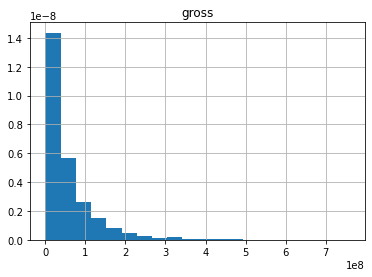

In [5]:
df.hist(column=['gross'], bins=20, density =True)

"None of your observed variables have to be normal in linear regression analysis, which includes t-test and ANOVA. The errors after modeling, however, should be normal to draw a valid conclusion by hypothesis testing."

https://data.library.virginia.edu/normality-assumption/

In [6]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'movie_imdb_link', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'rating', 'G', 'PG', 'PG-13',
       'R', 'unrated', 'superstar', 'years_old'],
      dtype='object')

In [7]:
features =  ['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'actor_2_facebook_likes',
 'imdb_score','G', 'PG', 'PG-13',
'R', 'superstar', 'years_old']

In [8]:
df[features].dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
budget                       float64
actor_2_facebook_likes       float64
imdb_score                   float64
G                              int64
PG                             int64
PG-13                          int64
R                              int64
superstar                      int64
years_old                      int64
dtype: object

In [9]:
from statsmodels.formula.api import ols

lr_model = ols(formula='gross~budget + cast_total_facebook_likes + director_facebook_likes + years_old +G +PG+R+superstar', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     304.9
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        16:07:47   Log-Likelihood:                -60409.
No. Observations:                3142   AIC:                         1.208e+05
Df Residuals:                    3133   BIC:                         1.209e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -8.126e+05    2.6e+06     -0.313      0.754    -5.9e+06    4.28e+06
budget                        1.0263      0.025     40.743      0.000       0.977       1.076
cast_total_facebook_likes   362.4559     58.111      6.237      0.000     248.515     476.396
director_facebook_likes    1393.4225    297.881      4.678      0.000     809.361    1977.485
years_old                  9.595e+05   1.18e+05      8.129      0.000    7.28e+05    1.19e+06
G                          2.022e+07   6.58e+06      3.073      0.002    7.32e+06    3.31e+07
PG                         6.227e+06   2.93e+06      2.124      0.034     4.8e+05     1.2e+07
R                         -7.984e+06   2.26e+06     -3.528      0.000   -1.24e+07   -3.55e+06
superstar                 -6.744e+06   6.14e+06     -1.098      0.272   -1.88e+07     5.3e+06
==============================================================================
Omnibus:                     1758.056   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25024.625
Skew:                           2.355   Prob(JB):                         0.00
Kurtosis:                      15.999   Cond. No.                     4.07e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Working with SKlearn

In [10]:
subset =[
 'director_facebook_likes',
 'cast_total_facebook_likes',
 'budget','G', 'PG', 
'R', 'superstar', 'years_old']

In [11]:
df[subset]

,director_facebook_likes,cast_total_facebook_likes,budget,G,PG,R,superstar,years_old
0,0.0,4834,237000000.0,0,0,0,0,7
1,563.0,48350,300000000.0,0,0,0,1,9
3,22000.0,106759,250000000.0,0,0,0,0,4
5,475.0,1873,263700000.0,0,0,0,0,4
6,0.0,46055,258000000.0,0,0,0,0,9
...,...,...,...,...,...,...,...,...
5021,157.0,1064,15000.0,0,0,1,0,11
5033,291.0,368,7000.0,0,0,0,0,12
5035,0.0,147,7000.0,0,0,1,0,24
5041,0.0,2386,53681048.4,0,0,0,0,4


In [12]:
df[subset].isnull().mean()

director_facebook_likes      0.0
cast_total_facebook_likes    0.0
budget                       0.0
G                            0.0
PG                           0.0
R                            0.0
superstar                    0.0
years_old                    0.0
dtype: float64

In [13]:
# fit a model
#import the class
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(df[subset], df['gross'])


print(lm.intercept_)
print(lm.coef_)

-812596.6879704595
[ 1.39342251e+03  3.62455850e+02  1.02630179e+00  2.02185454e+07
  6.22701503e+06 -7.98410386e+06 -6.74369056e+06  9.59540875e+05]


In [19]:
y_pred = lm.predict(df[subset])

In [20]:
y_pred[:100]

array([2.50889826e+08, 3.27279356e+08, 3.28951734e+08, 2.75002105e+08,
       2.89302038e+08, 2.78768991e+08, 2.90068331e+08, 2.64624897e+08,
       2.34150300e+08, 2.51315556e+08, 2.33346610e+08, 2.40412462e+08,
       2.52346783e+08, 2.60598252e+08, 2.73770708e+08, 2.38762229e+08,
       2.50047532e+08, 2.11380814e+08, 2.36301125e+08, 2.01474706e+08,
       2.39070379e+08, 2.79380247e+08, 2.27933902e+08, 1.57666464e+08,
       2.31688487e+08, 2.19747889e+08, 2.56783707e+08, 2.32983668e+08,
       2.12330931e+08, 2.18075335e+08, 2.48823356e+08, 2.17390865e+08,
       1.95410921e+08, 2.31767136e+08, 2.16004852e+08, 2.37515200e+08,
       2.21633265e+08, 2.23832665e+08, 2.09354438e+08, 2.32763941e+08,
       2.24331824e+08, 2.02834973e+08, 2.16307729e+08, 2.04010195e+08,
       2.05053805e+08, 2.21659454e+08, 6.22820891e+07, 2.01010537e+08,
       1.90483135e+08, 2.13556780e+08, 1.52498522e+08, 2.13022949e+08,
       2.35107680e+08, 1.97932545e+08, 1.91989674e+08, 2.01292519e+08,
      

Text(0, 0.5, 'Predictions')

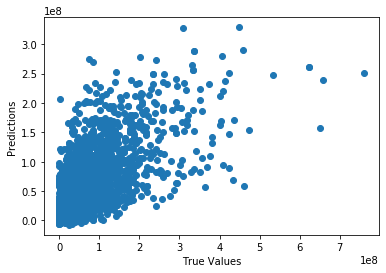

In [21]:
## The line / model
plt.scatter( df['gross'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### Plot our residuals

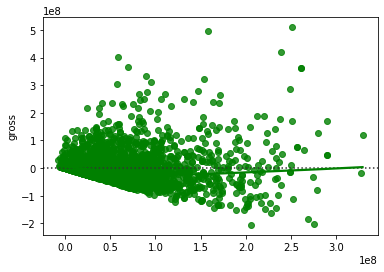

In [22]:
sns.residplot(y_pred, df['gross'], lowess=True, color="g")

### Plot the distribution of the residuals

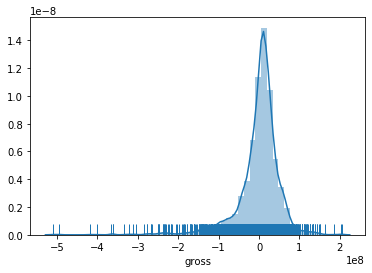

In [23]:
sns.distplot((y_pred- df['gross']), kde=True, rug=True);

#### How do we fix the normality issue:
Usually there are 3 reasons why this issue(error does not follow normal distribution) would occur:
- Non linear relationship between features and target
- Dependent or independent variables are too non-normal(can see from skewness or kurtosis of the variable)
- Existence of a few outliers/extreme values which disrupt the model prediction

https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd

**We do however require a linear relationship between the target and each individual feature. The main way to check for this is by creating a scatterplot of the variables.**   

https://online.stat.psu.edu/stat462/node/123/

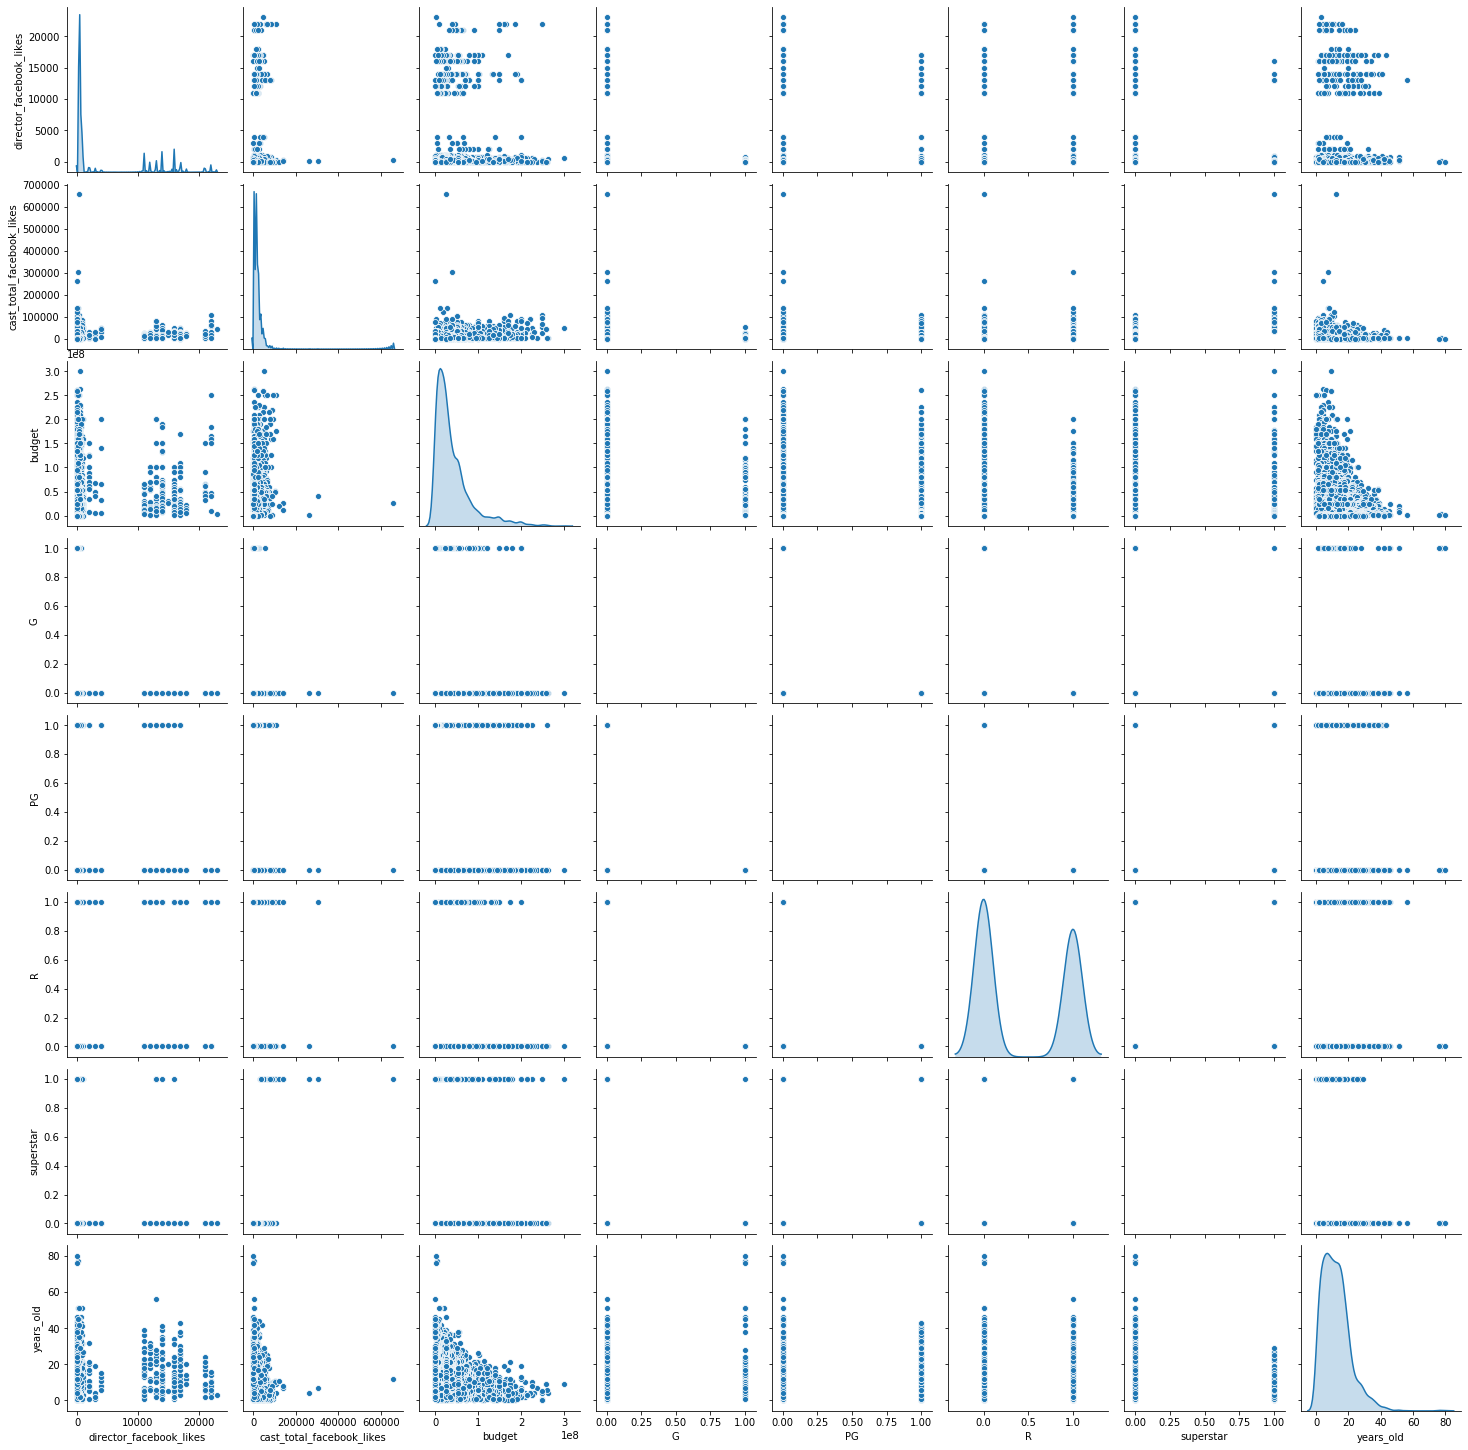

In [24]:
sns.pairplot(df[subset], diag_kind="kde", height=2.5)

In [25]:
#break the colums in to groups to plot 4 on a row at a time
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

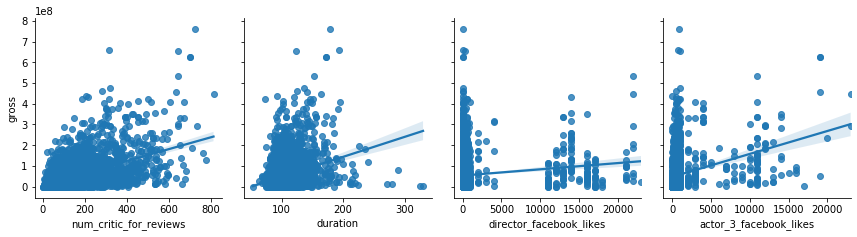

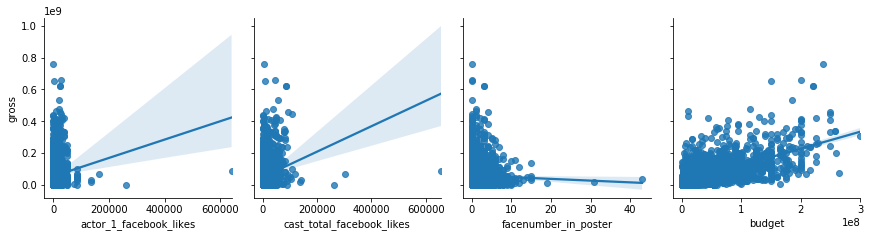

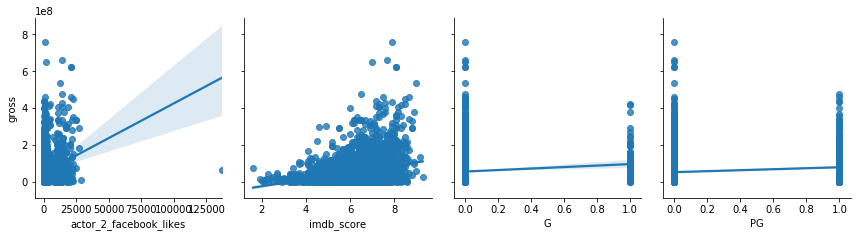

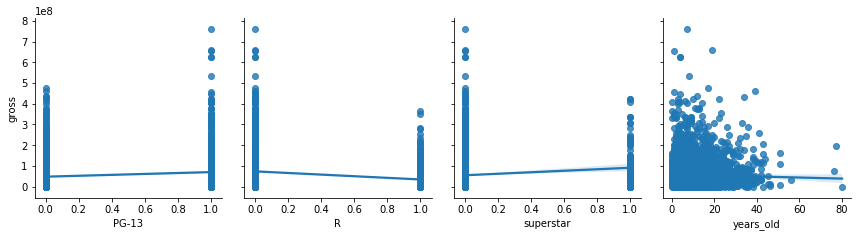

In [26]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

One thing that we can see from these visualizations is that there are some extreme values (outliers) for some of the features that are making the relationship unclear. 

In [27]:
df['actor_1_facebook_likes'].describe()

count      3142.000000
mean       8150.281349
std       16568.236742
min           0.000000
25%         818.000000
50%        2000.000000
75%       13000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [28]:
df['actor_2_facebook_likes'].describe()

count      3141.000000
mean       2150.759949
std        4752.175113
min           0.000000
25%         442.000000
50%         729.000000
75%         995.000000
max      137000.000000
Name: actor_2_facebook_likes, dtype: float64

We could remove those obaservations from the dataset as a way of dealing with it.  

In [29]:
df[df['actor_1_facebook_likes']<630000]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated,superstar,years_old
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0,0,7
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13,0,0,1,0,0,1,9
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13,0,0,1,0,0,0,4
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13,0,0,1,0,0,0,4
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13,0,0,1,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5021,Color,Jay Duplass,51.0,85.0,157.0,10.0,Katie Aselton,830.0,192467.0,Mark Duplass,The Puffy Chair,4067,1064,Bari Hyman,0.0,http://www.imdb.com/title/tt0436689/?ref_=fn_t...,71.0,English,USA,R,15000.0,2005-01-01,224.0,6.6,R,0,0,0,1,0,0,11
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Shane Carruth,Primer,72639,368,Casey Gooden,0.0,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,371.0,English,USA,PG-13,7000.0,2004-01-01,45.0,7.0,PG-13,0,0,1,0,0,0,12
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,130.0,Spanish,USA,R,7000.0,1992-01-01,20.0,6.9,R,0,0,0,1,0,0,24
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,53681048.4,2012-01-01,719.0,6.3,PG-13,0,0,1,0,0,0,4


Another way would be to cap the extreme values to a much lower number so that we keep the observation, but it doesn't impact the model as much.

In [30]:
df['actor_1_facebook_likes']= np.where(df['actor_1_facebook_likes'] >200000, 200000, df['actor_1_facebook_likes'])

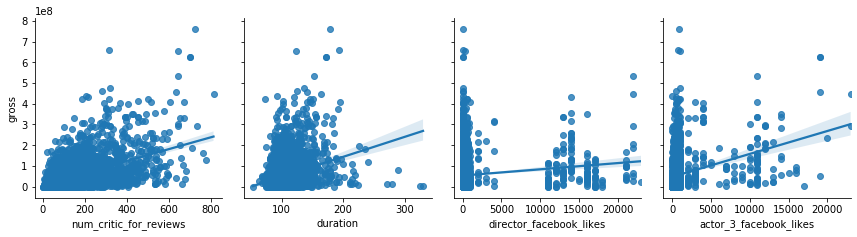

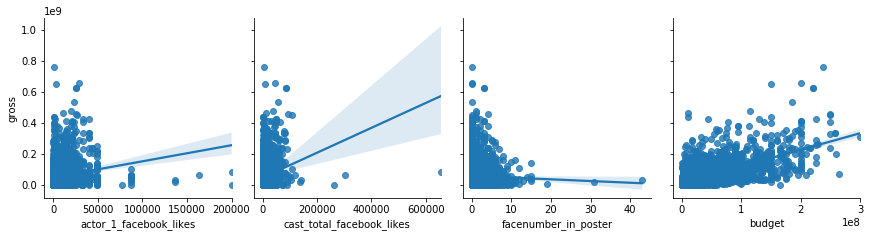

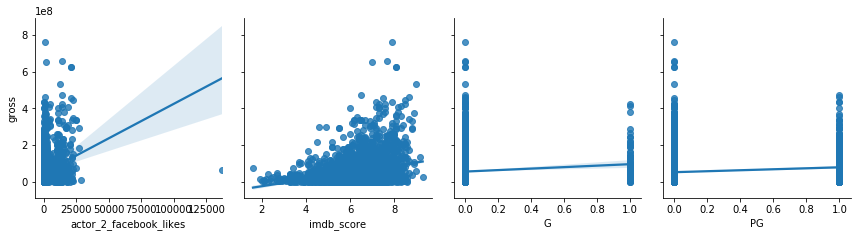

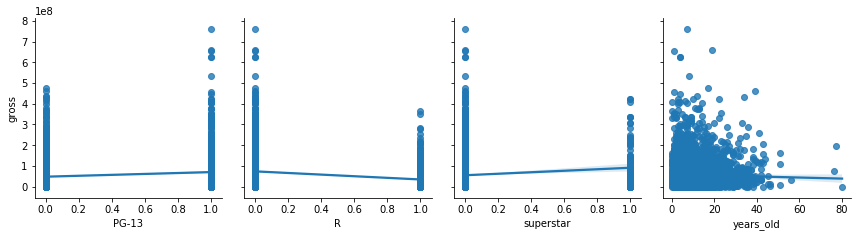

In [32]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['gross'],x_vars=i, kind="reg", height=3)

How would you describe the realtionship between gross and IMDB score seen below?

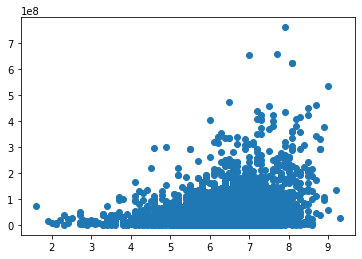

In [33]:
plt.scatter( df['imdb_score'], df['gross']);

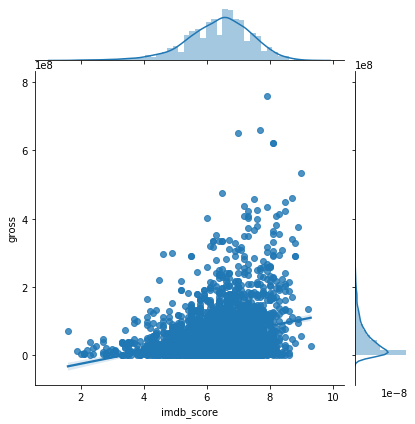

In [38]:
sns.jointplot(x="imdb_score", y="gross", data=df, kind="reg");


What could we do to make this more of a linear relationship?

In [34]:
df['log_gross'] = np.log(df['gross'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27c25128>]],
      dtype=object)

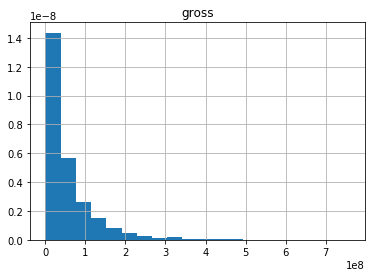

In [41]:
df.hist(column=['gross'], bins=20, density =True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27b08240>]],
      dtype=object)

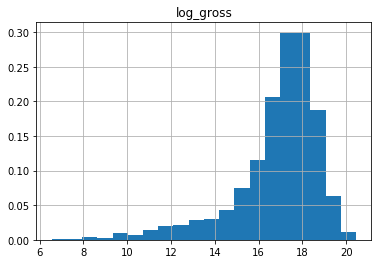

In [36]:
df.hist(column=['log_gross'], bins=20, density =True)

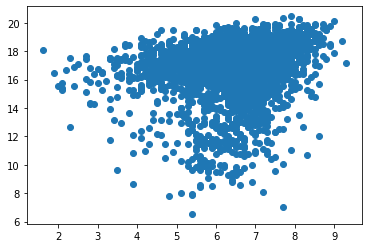

In [35]:
plt.scatter( df['imdb_score'], df['log_gross']);

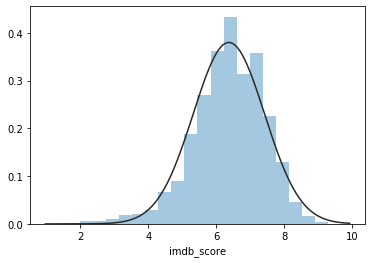

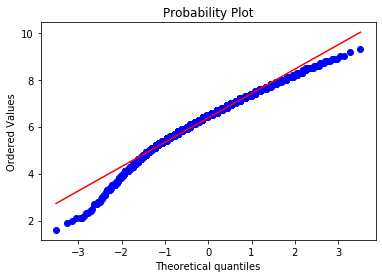

In [39]:


#histogram and normal probability plot
sns.distplot(df['imdb_score'], fit=norm, bins=20, kde=False);
fig = plt.figure()
res = stats.probplot(df['imdb_score'], plot=plt)


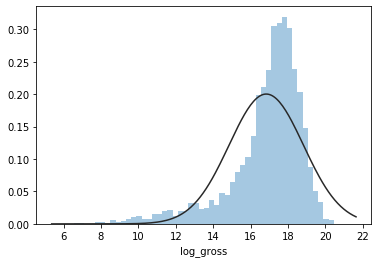

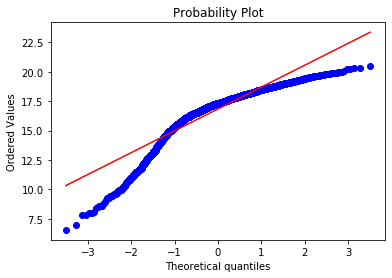

In [43]:
#transformed histogram and normal probability plot
sns.distplot(df['log_gross'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['log_gross'], plot=plt)

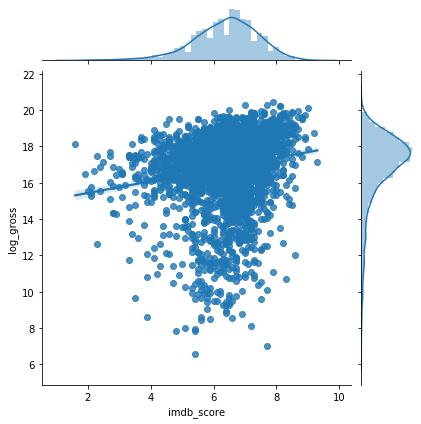

In [45]:
sns.jointplot(x="imdb_score", y="log_gross", data=df, kind="reg")

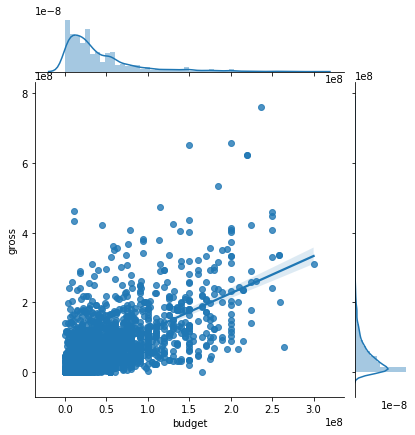

In [46]:
sns.jointplot(x="budget", y="gross", data=df, kind="reg")

In [47]:
df['budget_log'] = np.log(df['budget'])


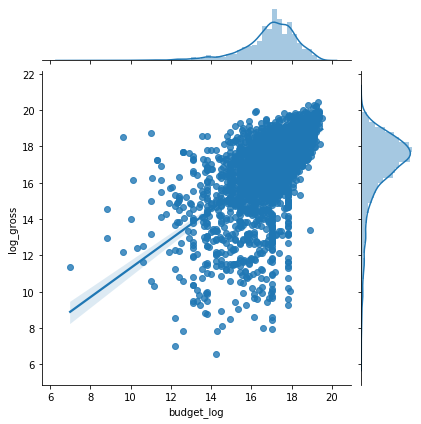

In [49]:
sns.jointplot(x="budget_log", y="log_gross", data=df, kind="reg")

***We can now use the natural log of price as our new target variable. We jsut need to undo this transformation after our predictions.***

`np.exp(df['gross_log']) `

https://stats.stackexchange.com/questions/260942/transforming-back-after-a-log-transformation

In [51]:
np.exp(df['log_gross']) 


0       7.605058e+08
1       3.094042e+08
3       4.481306e+08
5       7.305868e+07
6       3.365303e+08
            ...     
5021    1.924670e+05
5033    4.247600e+05
5035    2.040920e+06
5041    1.044300e+04
5042    8.522200e+04
Name: log_gross, Length: 3142, dtype: float64

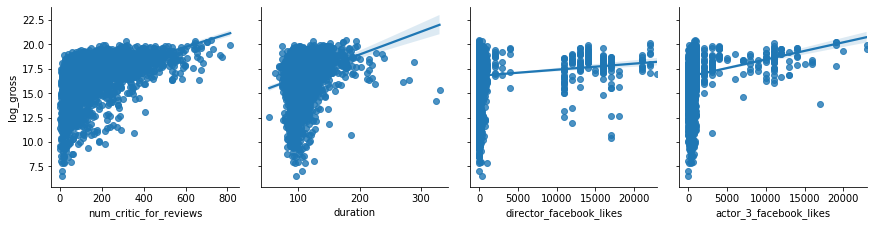

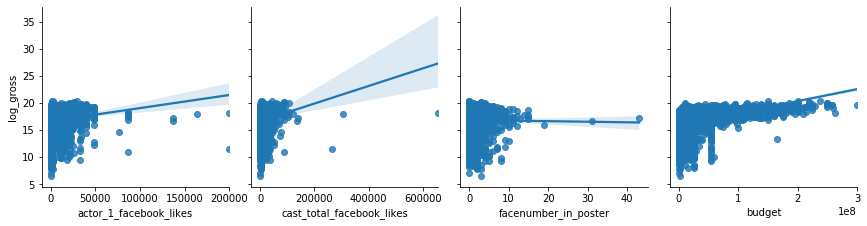

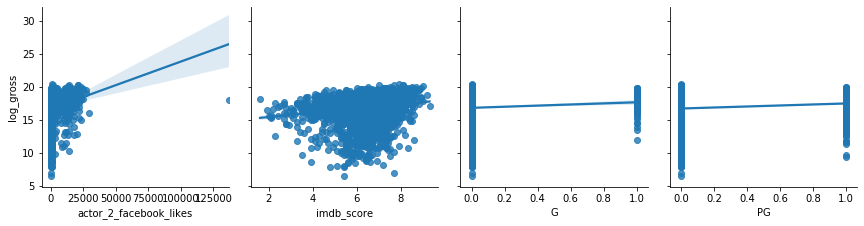

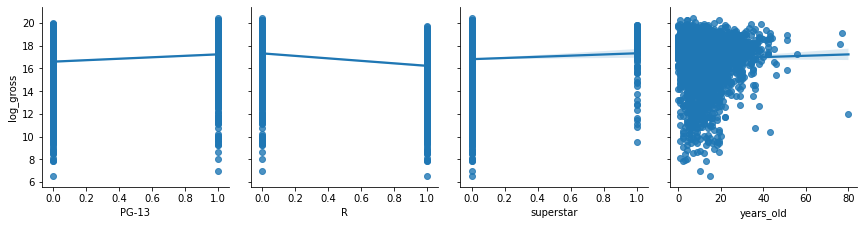

In [52]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['log_gross'],x_vars=i, kind="reg", height=3)

## Polynomial Features 

EArlier we showed how a quadratic model could capture a non-lienar relationship.  We can expand on this model to include higher degree polynomials of the feature to capture a more complex relationship.  
<img src='noisy-sine-third-order-polynomial.png' width=500 />


Blog Explainaing polynomial features in more details.  

https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

### Interaction terms

Interaction terms help to capture the relationship between two variables when that relationship could be dependent on another variable.  

**For example**, what do you think is the relationship between temperature and Citibike rentals?

Is that relationship alwasy consistent?

**FYI** - You can use interactions for both continuous variables and categorical/dummy variables

**Question:** Thinking about the features that box office gross, what are two possible features that could be interacted with eachother to better show the relationship to the gross?

<img src="interactions.png" style="width:600px;">

In [53]:
df['tempxrain']= df['temp']*df['rain']

KeyError: 'temp'

In [54]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,rating,G,PG,PG-13,R,unrated,superstar,years_old,log_gross,budget_log
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009-01-01,936.0,7.9,PG-13,0,0,1,0,0,0,7,20.449494,19.283571
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007-01-01,5000.0,7.1,PG-13,0,0,1,0,0,1,9,19.550159,19.519293
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012-01-01,23000.0,8.5,PG-13,0,0,1,0,0,0,4,19.920595,19.336971
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012-01-01,632.0,6.6,PG-13,0,0,1,0,0,0,4,18.106773,19.390323
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007-01-01,11000.0,6.2,PG-13,0,0,1,0,0,0,9,19.634199,19.368470


In [15]:
df['budgetxR']= df['budget']*df['R']

In [16]:
df[['budget', 'R','budgetxR']]

,budget,R,budgetxR
0,237000000.0,0,0.0
1,300000000.0,0,0.0
3,250000000.0,0,0.0
5,263700000.0,0,0.0
6,258000000.0,0,0.0
...,...,...,...
5021,15000.0,1,15000.0
5033,7000.0,0,0.0
5035,7000.0,1,7000.0
5041,53681048.4,0,0.0


In [18]:
lr_model = ols(formula='gross~budget + cast_total_facebook_likes + director_facebook_likes + years_old +G +PG+R+superstar+budgetxR', data=df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     273.6
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        16:43:27   Log-Likelihood:                -60402.
No. Observations:                3142   AIC:                         1.208e+05
Df Residuals:                    3132   BIC:                         1.209e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -3.174e+06   2.67e+06     -1.189      0.235   -8.41e+06    2.06e+06
budget                        1.0650      0.027     39.033      0.000       1.012       1.119
cast_total_facebook_likes   372.1839     58.059      6.410      0.000     258.347     486.021
director_facebook_likes    1455.5934    297.784      4.888      0.000     871.722    2039.465
years_old                  9.729e+05   1.18e+05      8.255      0.000    7.42e+05     1.2e+06
G                          2.014e+07   6.57e+06      3.067      0.002    7.27e+06     3.3e+07
PG                          6.22e+06   2.93e+06      2.126      0.034    4.84e+05     1.2e+07
R                         -1.024e+06   2.96e+06     -0.346      0.729   -6.82e+06    4.77e+06
superstar                 -8.107e+06   6.14e+06     -1.320      0.187   -2.02e+07    3.94e+06
budgetxR                     -0.2343      0.064     -3.651      0.000      -0.360      -0.108
==============================================================================
Omnibus:                     1731.460   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24233.078
Skew:                           2.313   Prob(JB):                         0.00
Kurtosis:                      15.795   Cond. No.                     4.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""